# Log Book 3

## A different integrator

23/02/23

Using the fourth order Runge-Kutta with rtol=1e-6 method with the 3 body orbit problem.

In [1]:
#Import statements
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initialising variables
G = 1
m1 = 1
m2 = 3e-6
m3 = 3.6e-8
m23 = m2 + m3



#x2 = 0.9999969631092
x2 = (1 - m2 * 0.0025)/(1 + m2 + m3)
x3 = 0.0025 + x2
x1 = x2 - 1.
x23 = (m2*x2 + m3*x3)/(m2 + m3)


# -------OLD INITIAL VELOCITIES WITH ERROR IN THAT DID NOT WORK------- 23/02/23
"""
v_x1 = -np.sqrt((m23 * -x1)/((x1-x23)**2))
v_x2 = np.sqrt((m3 * x2)/((x3-x2)**2))
v_x3 = -np.sqrt((m2 * x3)/((x3-x2)**2))
v_x23 = np.sqrt((m1 * x23)/((x1-x23)**2))
"""

#-------NEW INITIAL VELOCITIES THAT DO WORK------- 27/02/23

v_x1 = -np.sqrt((m23 * -x1)/((x1-x23)**2))
v_x2 = np.sqrt((m3 * (x23-x2))/((x3-x2)**2))
v_x3 = -np.sqrt((m2 * (x3-x23))/((x3-x2)**2))
v_x23 = np.sqrt((m1 * x23)/((x1-x23)**2))







At first, because I had the centre of mass of the entire system placed at the origin, I forgot I also need to include the centre of mass position of m23 when calculating initial conditions for m2 and m3.

In [3]:
def update_planet_func(t, init_list, G, m1, m23, m2, m3, KE1, KE2, KE3, KE23, PE1, PE2, PE3, PE23, L1, L2, L3, L23):
    """Calcuates r1 and r23 equations of motion and energy over time
    
    Inputs:
    t: time variable
    init_list: list of variables - 
                                [x1, y1, x23, y23, x2, y2, x3, y3, 
                                Vx1, Vy1, Vx23, Vy23, Vx2, Vy2, Vx3, Vy3]
    G: Value of gravity: const
    m1: mass of object 1
    m23: combined mass of objects 2 and 3
    m2: mass of object 2
    m3: mass of object 3
    KE1, KE2, KE3, KE23, PE1, PE2, PE3, PE23 L1, L2, L3, L23: energy lists
    Returns:
    next_val: Array containing updated values based on differential equations
    """

    r1 = np.array(init_list[:2])
    r23 = np.array(init_list[2:4])
    r2 = np.array(init_list[4:6])
    r3 = np.array(init_list[6:8])
    
    v1 = np.array(init_list[8:10])
    v23 = np.array(init_list[10:12])
    v2 = np.array(init_list[12:14])
    v3 = np.array(init_list[14:16])
    
    
    # Store energies
    KE1.append(1/2 * m1 * np.linalg.norm(v1)**2)
    PE1.append(- (G * m1 * m23)/np.linalg.norm(r23 - r1))
    L1.append(m1 * np.linalg.norm(v1) * np.linalg.norm(r1))
    
    KE2.append(1/2 * m2 * np.linalg.norm(v2)**2)
    PE2.append(- (G * m2 * m3)/np.linalg.norm(r3 - r2))
    L2.append(m2 * np.linalg.norm(v2) * np.linalg.norm(r2))
    
    KE3.append(1/2 * m3 * np.linalg.norm(v3)**2)
    PE3.append(- (G * m2 * m3)/np.linalg.norm(r2 - r3))
    L3.append(m3 * np.linalg.norm(v3) * np.linalg.norm(r3))
    
    KE23.append(1/2 * m23 * np.linalg.norm(v23)**2)
    PE23.append(- (G * m23 * m1)/np.linalg.norm(r1 - r23))
    L23.append(m23 * np.linalg.norm(v23) * np.linalg.norm(r23))
    
    #Calculating acceleration
    dv1 =  G * m23 * (r23 - r1)/(np.linalg.norm(r23 - r1)**3)
    dv23 =  G * m1 * (r1 - r23)/(np.linalg.norm(r23 - r1)**3)
    dv2 = G * m3 * (r3 - r2)/(np.linalg.norm(r3 - r2)**3)
    dv3 = G * m2 * (r2 - r3)/(np.linalg.norm(r3 - r2)**3)
    
    dr1 = v1
    dr23 = v23
    dr2 = v2
    dr3 = v3
    
    next_val = np.concatenate((dr1, dr23, dr2, dr3, dv1, dv23, dv2, dv3))
    
    return next_val
    

## Implementing the Runge kutta method using scipy

24/02/23

In [4]:
from scipy import integrate

In [5]:
# Define list of initial parameters
init_params = np.array([x1, 0., x23, 0., x2, 0., x3, 0., 
                        0., v_x1, 0., v_x23, 0., v_x2, 0., v_x3])

#Times for solution to be evaluated at 
t_eval = np.linspace(0, 20, 10000)

#Energy lists
KE1, KE2, KE3, KE23 = [], [], [], []
PE1, PE2, PE3, PE23 = [], [], [], []
L1, L2, L3, L23 = [], [], [], []

In [6]:
#Running the solver
centre_of_mass_sol = integrate.solve_ivp(update_planet_func, [0, 20], init_params, t_eval=t_eval, method='RK45', 
                                         rtol=1e-6, 
                                         args=(G, m1, m23, m2, m3, KE1, KE2, KE3, KE23, PE1, PE2, PE3, PE23, L1, L2, L3, L23))
print(centre_of_mass_sol.success)

True


#### Runge Kutta method - RK45 - issues and resolution
23/02/23
I had an issue for a while where I could not get the RK45 method to work, with it returning an error message saying: $\textit{'Required step size is less than spacing between numbers.'}$ and no changing in t_eval would change this.
$\newline$
24/02/23
After some research I believe this might come from the initial conditions not being correct to a high enough precision which means that under the RK45 the outer objects (2 and 3) get closer and closer together making the vector $\frac{1}{r_{23}}$ blow up to being very large, which means that the step size that RK45 thinks needs to be taken gets smaller and smaller, until it becomes too small (I think once it becomes smaller than the double precision of the machine or python) and it produces the error message and stops the calculation.
$\newline$
26/02/23
The smaller time step spacing as time goes on can quite clearly be seen for the RK45 method by changing the method parameter in the above solve_ivp call to RK45 and looking at the eccentricity graph this produces, where it originally starts with the same graph as the velocity verlet, however the spacing between the peaks gets smaller and smaller until it eventually breaks, which physically would be the frequency of object3's orbit getting faster and faster around object 2, which would require a smaller and smaller radius of orbit.
$\newline$
27/02/23 To avoid this error, I initially used the RK23 scipy method, which seems to have a larger tolerance on initial conditions and produced the same output as the velocity verlet method in the previous logbook.
I could also have avoided this error by just calculating it as 3 independant bodies and ignoring the centre of mass of 2 and 3.
$\newline$
10/03/23
From further research on this issue I have managed to get RK45 method to work. The issue was not the initial conditions as I once thought, but instead an issue with the tolerances within the scipy method. If rtol (the relative tolerance within the solver) is set to a low enough value, the solver does not encounter the error described previously and produces the expected outcome.
I found an rtol of 1e-6 was low enough for all of my applications. I believe this may come about because the solver took too big of a time step initially which led to the two outer bodies being closer together than they were meant to be, which meant the two objects spiralled in towards each other until they were at the same point in space and the solver crashed.

I have included below what I had before for the RK45 to show what was going wrong.

## Working RK45



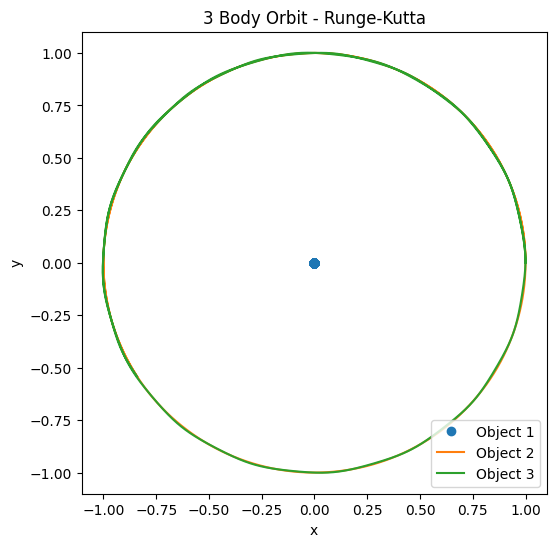

In [7]:
#Plotting 3 bodies
r2x_plot = centre_of_mass_sol.y[2, :] + centre_of_mass_sol.y[4, :] - centre_of_mass_sol.y[4, 0]
r2y_plot = centre_of_mass_sol.y[3, :] + centre_of_mass_sol.y[5, :]

r3x_plot = centre_of_mass_sol.y[2, :] + centre_of_mass_sol.y[6, :] - centre_of_mass_sol.y[6, 0]
r3y_plot = centre_of_mass_sol.y[3, :] + centre_of_mass_sol.y[7, :] 

M = 5000
plt.figure(figsize=(6, 6))
plt.plot(centre_of_mass_sol.y[0, :M], centre_of_mass_sol.y[1, :M], 'o', label = "Object 1")
plt.plot(r2x_plot[:M], r2y_plot[:M], label="Object 2")
plt.plot(r3x_plot[:M], r3y_plot[:M], label = "Object 3")

plt.xlabel("x")
plt.ylabel("y")
plt.title("3 Body Orbit - Runge-Kutta")

#plt.xlim((0.5, 1.05))
#plt.ylim((0, 1))

plt.legend()

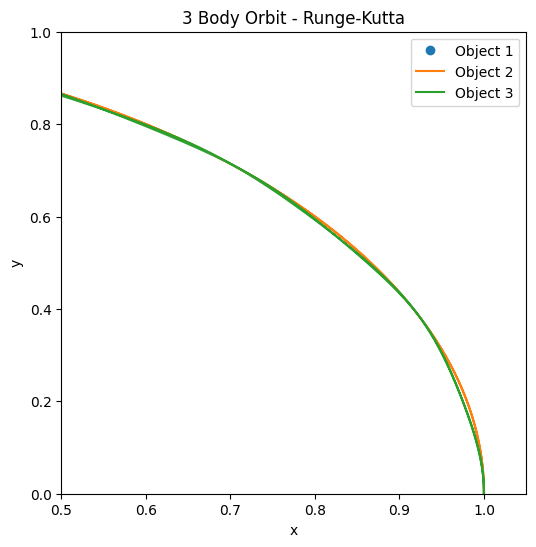

In [8]:
M = 5000
plt.figure(figsize=(6, 6))
plt.plot(centre_of_mass_sol.y[0, :M], centre_of_mass_sol.y[1, :M], 'o', label = "Object 1")
plt.plot(r2x_plot[:M], r2y_plot[:M], label="Object 2")
plt.plot(r3x_plot[:M], r3y_plot[:M], label = "Object 3")

plt.xlabel("x")
plt.ylabel("y")
plt.title("3 Body Orbit - Runge-Kutta")

plt.xlim((0.5, 1.05))
plt.ylim((0, 1))

plt.legend()

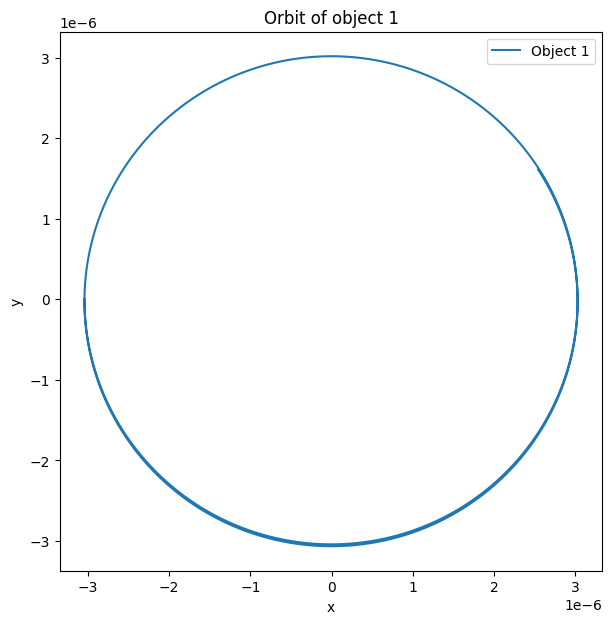

In [9]:
#Plotting orbit of object 1
plt.figure(figsize=(7, 7))

plt.plot(centre_of_mass_sol.y[0, :M], centre_of_mass_sol.y[1, :M], label = "Object 1")
plt.legend()

# Adding a title and axes labels
plt.title('Orbit of object 1')
plt.xlabel("x");
plt.ylabel("y");

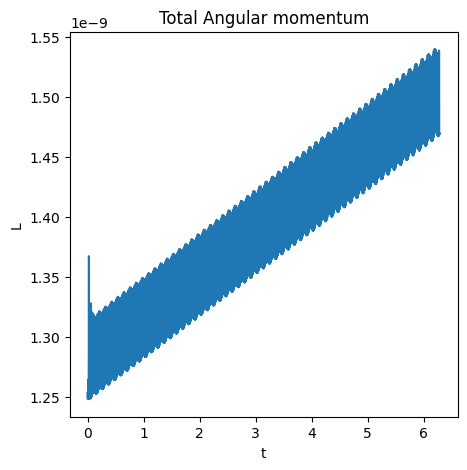

In [10]:
#Plotting total angular momentum
plt.figure(figsize=(5, 5))
L_tot = np.array((L1)) + np.array((L2))

plt.plot(t_eval[:3146], L_tot[:3146])



# Adding a title and axes labels
plt.title('Total Angular momentum')
plt.xlabel("t");
plt.ylabel("L");

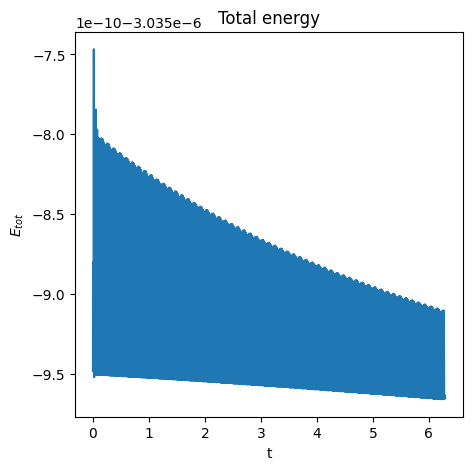

In [11]:
#Plotting total energy
PE_tot = np.array((PE1)) + np.array((PE2)) 
KE_tot = np.array((KE1)) + np.array((KE2))
E_tot = PE_tot + KE_tot
plt.figure(figsize=(5, 5))


plt.plot(t_eval[:3146], E_tot[:3146])


# Adding a title and axes labels
plt.title('Total energy')
plt.xlabel("t");
plt.ylabel(r"$E_{tot}$");

## Eccentricity

26/02/23

REFERENCE [7]

Laplace-Runge-Lenz-Pauli vector:

$$ L = \frac{\textbf{r}_R}{r_R} - \frac{v_R^2 \textbf{r}_R - (\textbf{r}_R \cdot \textbf{v}_R) \textbf{v}_R}{G(M_E + M_M)} $$

_R = relative earth moon position

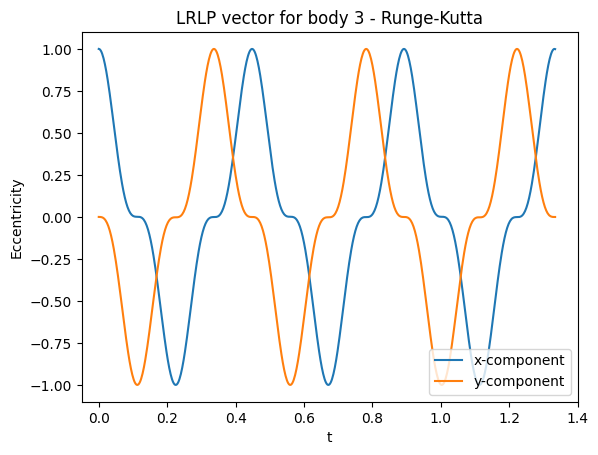

In [12]:
# Calcualting the eccentricity of object 3
r2 = centre_of_mass_sol.y[4:6].T
r3 = centre_of_mass_sol.y[6:8].T

v2 = centre_of_mass_sol.y[12:14].T
v3 = centre_of_mass_sol.y[14:16].T


Ecc = np.zeros_like(r2)
for i in range(len(r2)):
    r_R = r3[i] - r2[i] 
    r_R_mag = np.linalg.norm(r_R)
    v_R = v3[i]  - v2[i] 
    v_R_mag = v3[i]  - v2[i] 

    Ecc[i] = r_R / r_R_mag - (v_R**2 * r_R - np.dot(r_R, v_R) * v_R)/(G*(m2 + m3))


B = 668 #Shortening plot of graph to better see shape
plt.plot(t_eval[:B], Ecc[:B, 0], label = "x-component")
plt.plot(t_eval[:B], Ecc[:B, 1], label = "y-component")
plt.legend(loc='lower right')

plt.xlim([-0.05, 1.4])

# Adding a title and axes labels
plt.title('LRLP vector for body 3 - Runge-Kutta')
plt.xlabel("t");
plt.ylabel("Eccentricity");

From this eccentricity graph looks the same as the same as the velocity verlet method, so fairly confident that the RK45 method is working.

## Not working RK45
RK45 with rtol left unset

In [14]:
#Original input to solve_ivp -BROKEN VERSION
centre_of_mass_sol_2 = integrate.solve_ivp(update_planet_func, [0, 40], init_params, t_eval=t_eval, method='RK45', 
                                          args=(G, m1, m23, m2, m3, KE1, KE2, KE23, KE3, PE1, PE2, PE23, PE3, L1, L2, L23, L3))
print(centre_of_mass_sol_2)

  message: 'Required step size is less than spacing between numbers.'
     nfev: 6512
     njev: 0
      nlu: 0
      sol: None
   status: -1
  success: False
        t: array([0.00000000e+00, 2.00020002e-03, 4.00040004e-03, ...,
       2.07820782e+00, 2.08020802e+00, 2.08220822e+00])
 t_events: None
        y: array([[-3.04349076e-06, -3.04348469e-06, -3.04346647e-06, ...,
         1.46763497e-06,  1.47293968e-06,  1.47823847e-06],
       [ 0.00000000e+00, -6.07990987e-09, -1.21597954e-08, ...,
        -2.66137686e-06, -2.65842870e-06, -2.65546994e-06],
       [ 1.00002660e+00,  1.00002460e+00,  1.00001860e+00, ...,
        -4.85851439e-01, -4.87598709e-01, -4.89344029e-01],
       ...,
       [ 4.13220266e-04,  4.13059662e-04,  4.12577961e-04, ...,
         3.44507663e-03, -3.25849556e-03,  4.76081379e-03],
       [ 0.00000000e+00, -9.59972032e-04, -1.91920445e-03, ...,
        -1.12795345e-02, -2.20886664e-01, -4.76986739e-01],
       [-3.44350222e-02, -3.44216385e-02, -3.43814967e-

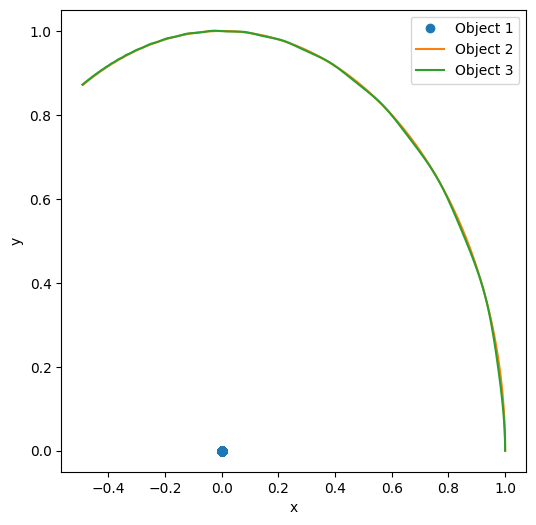

In [15]:
#Plotting 3 bodies -BROKEN VERSION
r2x_plot = centre_of_mass_sol_2.y[2, :] + centre_of_mass_sol_2.y[4, :] - centre_of_mass_sol_2.y[4, 0]
r2y_plot = centre_of_mass_sol_2.y[3, :] + centre_of_mass_sol_2.y[5, :]

r3x_plot = centre_of_mass_sol_2.y[2, :] + centre_of_mass_sol_2.y[6, :] - centre_of_mass_sol_2.y[6, 0]
r3y_plot = centre_of_mass_sol_2.y[3, :] + centre_of_mass_sol_2.y[7, :] 

M = 3500
plt.figure(figsize=(6, 6))
plt.plot(centre_of_mass_sol_2.y[0, :M], centre_of_mass_sol_2.y[1, :M], 'o', label = "Object 1")
plt.plot(r2x_plot[:M], r2y_plot[:M], label="Object 2")
plt.plot(r3x_plot[:M], r3y_plot[:M], label = "Object 3")

plt.xlabel("x")
plt.ylabel("y")

#plt.xlim((0.5, 1.05))

plt.legend()

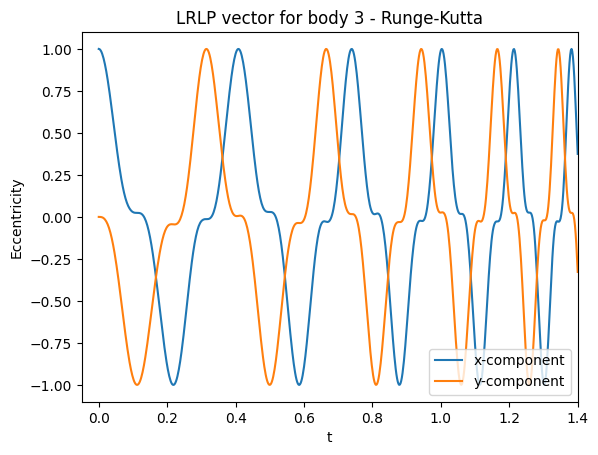

In [18]:
# Calcualting the eccentricity of object 3
r2 = centre_of_mass_sol_2.y[4:6].T
r3 = centre_of_mass_sol_2.y[6:8].T

v2 = centre_of_mass_sol_2.y[12:14].T
v3 = centre_of_mass_sol_2.y[14:16].T


Ecc = np.zeros_like(r2)
for i in range(len(r2)):
    r_R = r3[i] - r2[i] 
    r_R_mag = np.linalg.norm(r_R)
    v_R = v3[i]  - v2[i] 
    v_R_mag = v3[i]  - v2[i] 

    Ecc[i] = r_R / r_R_mag - (v_R**2 * r_R - np.dot(r_R, v_R) * v_R)/(G*(m2 + m3))


B = 1041
plt.plot(t_eval[:B], Ecc[:B, 0], label = "x-component")
plt.plot(t_eval[:B], Ecc[:B, 1], label = "y-component")
plt.legend(loc='lower right')

plt.xlim([-0.05, 1.4])

# Adding a title and axes labels
plt.title('LRLP vector for body 3 - Runge-Kutta')
plt.xlabel("t");
plt.ylabel("Eccentricity");